# Customizing Plots with Matplotlib
v.ekc

In the last lecture we learned how to create basic plots and choose plot types. Today we focus fine tuning your plots to be clear, informative, and publication-quality :)

**Sections:**
1. Setup & Sample Data
2. Figure Layout — Subplots
3. Labels, Titles & Legends
4. Ticks & Grids
5. Annotations & Other Modifications
6. Styles & Global Settings (`rcParams`)
7. Applied Example — Real Data
8. Activity

---
## 1. Setup, Sample Data

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
# Reproducible random data we'll use throughout the lecture
np.random.seed(42)
x  = range(10)
y  = np.random.randint(1, 10, 10)
y2 = np.random.randint(1, 100, 10)
y3 = np.random.randint(1, 100, 10)
y4 = np.random.randint(1, 100, 10)
y5 = np.random.randint(1, 100, 10)
y6 = np.random.randint(1, 100, 10)

---
## 2. Figure Layout — Subplots

A Matplotlib **Figure** is the blank canvas. **Axes** are the individual plots that live inside it. You can arrange multiple Axes in a grid using `plt.subplots()`.

### Two ways to add subplots

| Method | Syntax | Best for |
|---|---|---|
| Add one subplot at a time | `fig.add_subplot(rci)` | Adding subplots incrementally / after the fact |
| Create all subplots at once | `fig, ax = plt.subplots(rows, cols)` | When you know the layout up front |

> **Rule of thumb:** Prefer `plt.subplots()` — it's cleaner and returns the axes as an array you can index.

### 2a. `fig.add_subplot(rci)` — incremental approach

`figure.add_subplot(rci)` — `r`=rows, `c`=columns, `i`=index of the subplot being added

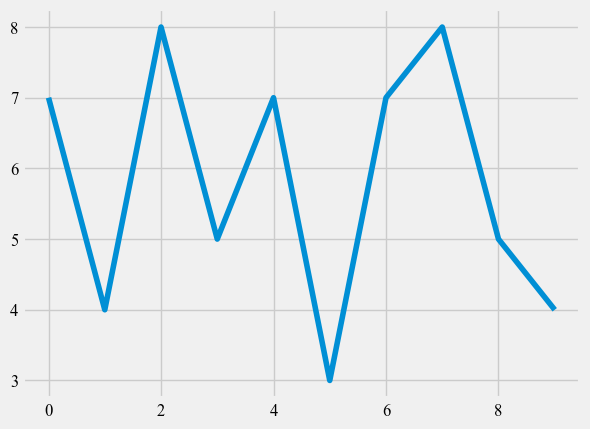

In [65]:
# Single subplot
figure = plt.figure()
ax = figure.add_subplot(111)   # 1 row, 1 col, subplot #1
ax.plot(x, y)
plt.show()

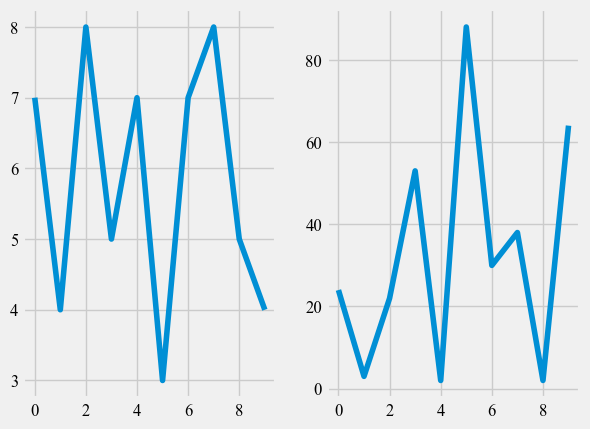

In [66]:
# Two side-by-side subplots
figure = plt.figure()
ax  = figure.add_subplot(121)  # 1 row, 2 cols, subplot #1
ax2 = figure.add_subplot(122)  # 1 row, 2 cols, subplot #2

ax.plot(x, y)
ax2.plot(x, y2)
plt.show()

### 2b. `plt.subplots()` — preferred approach

`fig, ax = plt.subplots(rows, cols, figsize=(height, length))`

- Returns a **Figure** and an **array of Axes**
- Index with `ax[i]` (1-D) or `ax[row, col]` (2-D)

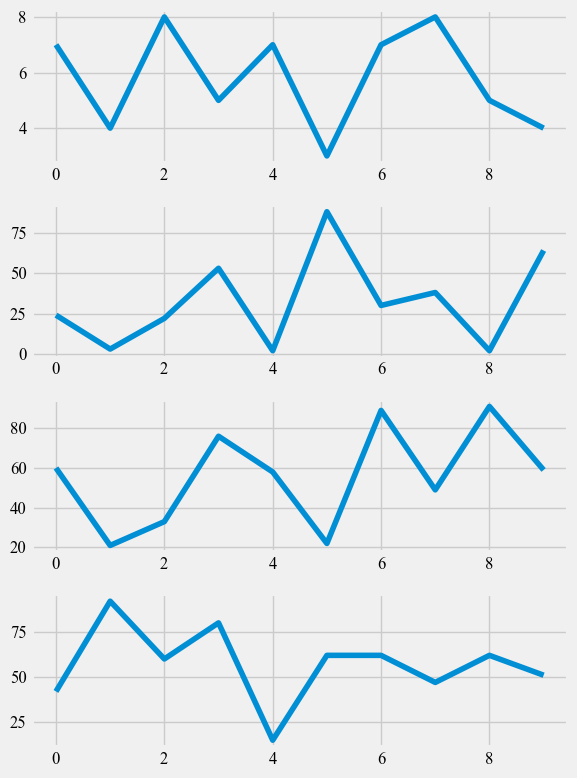

In [67]:
# 4 stacked plots — ax is a 1-D array of length 4
fig, ax = plt.subplots(4, figsize=(6, 8))

ax[0].plot(y)
ax[1].plot(y2)
ax[2].plot(y3)
ax[3].plot(y4)
plt.tight_layout()
plt.show()

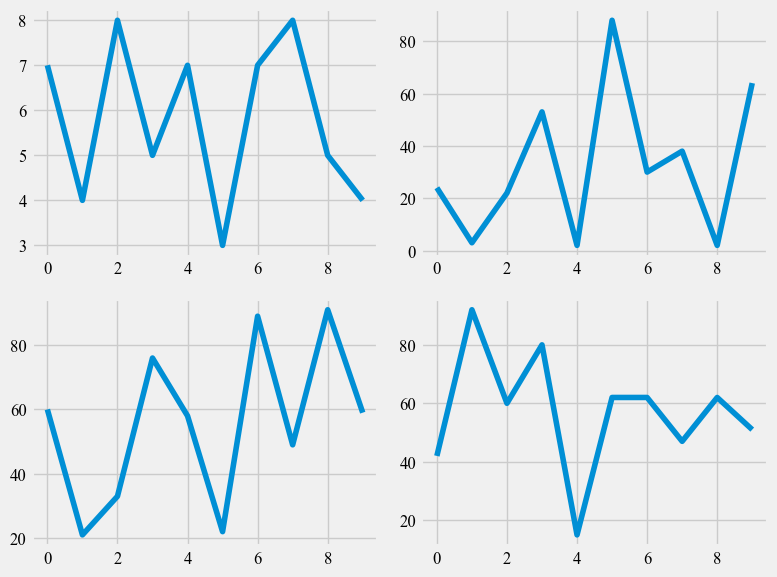

In [68]:
# 2×2 grid — ax is a 2-D array, indexed as ax[row, col]
fig, ax = plt.subplots(2, 2, figsize=(8, 6))

ax[0, 0].plot(y)
ax[0, 1].plot(y2)
ax[1, 0].plot(y3)
ax[1, 1].plot(y4)
plt.tight_layout()
plt.show()

### ✏️ Check-in 1 — Subplots

Using `plt.subplots()` and the sample data (`y`, `y2`, `y3`, `y4`) defined above:

1. Create a $1  \times  2$ (row $\times $ col)subplot figure with `figsize=(10, 4)`. Put a line plot of `y` in the left panel and a line plot of `y2` in the right panel. Give each subplot its own title.
2. Now make a $2  \times 3$ grid. Plot `y`, `y2`, `y3`, `y4`, `y5`, `y6`, one per panel and going clockwise starting in the upper left. Add `plt.tight_layout()` before `plt.show()`.

In [69]:
# 1. Side-by-side subplots


In [70]:
# 2. 2×2 grid


#### Answer

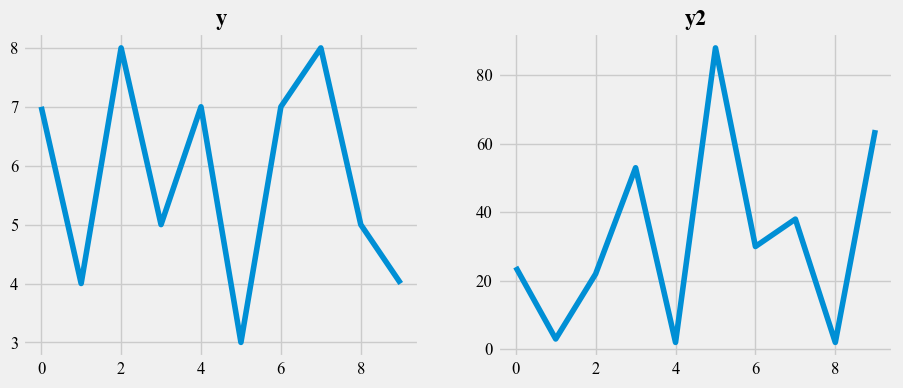

In [71]:
# 1.
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(y)
ax[0].set_title('y')

ax[1].plot(y2)
ax[1].set_title('y2')

plt.show()

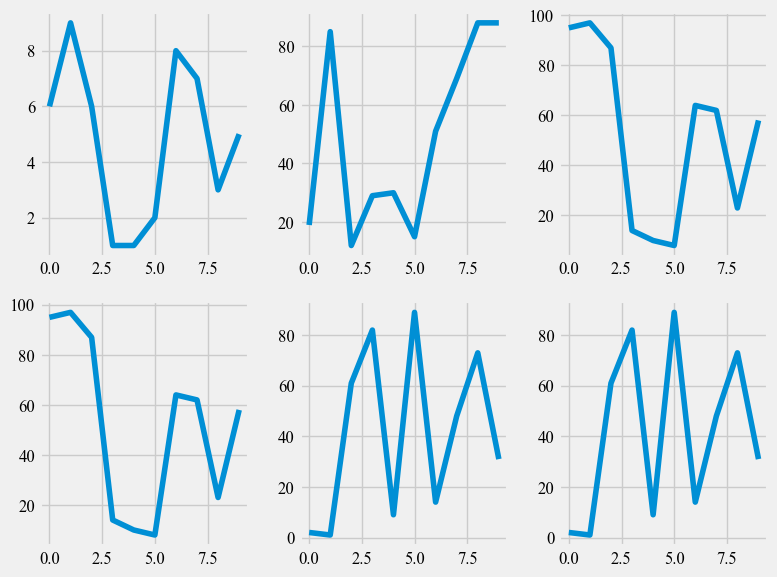

In [47]:
# 2.
fig, ax = plt.subplots(2, 3, figsize=(8, 6))

ax[0, 0].plot(y)
ax[0, 1].plot(y2)
ax[0, 2].plot(y3)
ax[1, 0].plot(y4)
ax[1, 1].plot(y5)
ax[1, 2].plot(y6)

plt.tight_layout()
plt.show()

### How can we plot a $(2\times 3)$ axis figure using a loop?

#### Answer

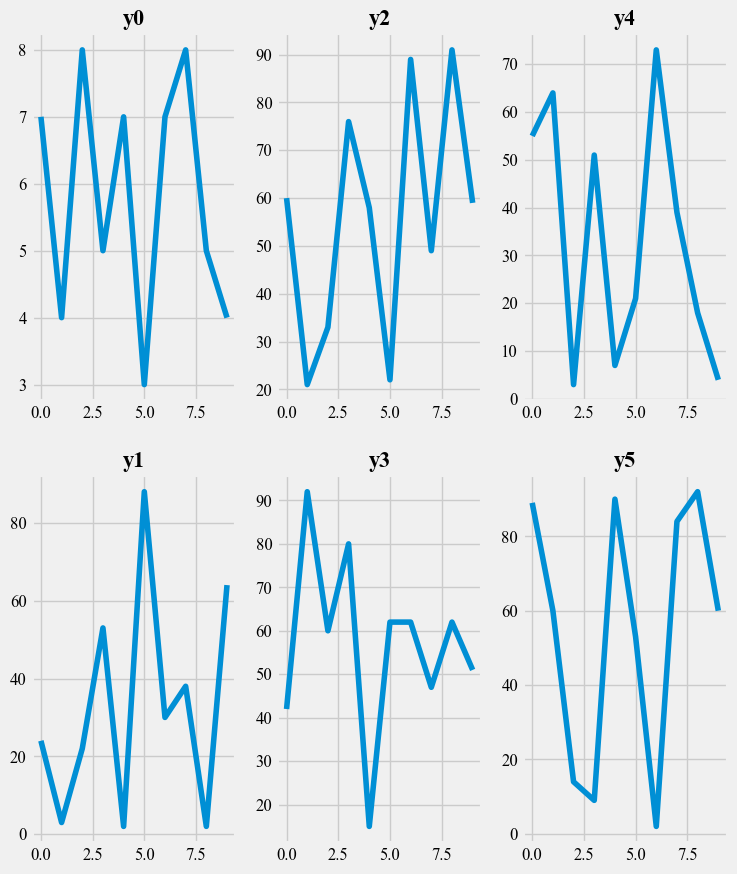

In [61]:
rows=2
columns=3
ys = [y, y2, y3, y4, y5, y6]
fig, ax = plt.subplots(2, 3, figsize=(8,10))
for r in range(rows):
    for c in range(columns):
        ax[r, c].plot(ys[r+2*c])
        ax[r,c].set_title(f'''y{r+2*c}''')
plt.show()

---
## 3. Labels, Titles, Legends

Every good plot needs context. The table below maps the two syntax styles (basic `plt` vs. object-oriented `ax`) to the most common annotation methods.

| What you want | `plt` syntax | `ax` (OOP) syntax |
|---|---|---|
| X-axis label | `plt.xlabel('label')` | `ax.set_xlabel('label')` |
| Y-axis label | `plt.ylabel('label')` | `ax.set_ylabel('label')` |
| Plot title | `plt.title('title')` | `ax.set_title('title')` |
| Overall figure title | — | `fig.suptitle('title')` |
| Legend (pass list) | `plt.legend(['a','b'])` | `ax.legend(['a','b'])` |
| Legend (use `label=`) | `plt.legend()` | `ax.legend()` |

### 3a. Axis labels

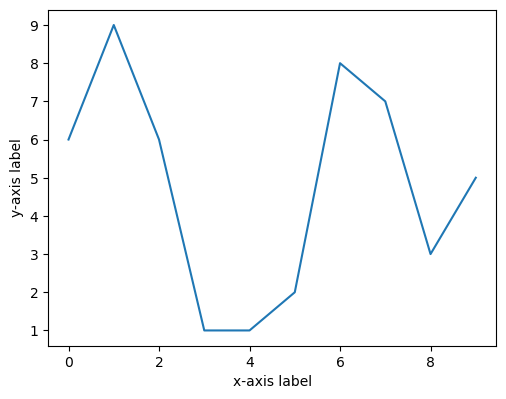

In [11]:
# Object-oriented style (preferred when using ax)
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y)
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')

ax.set_title('Plot Title')

plt.show()

### 3b. Titles — single plot vs. subplots

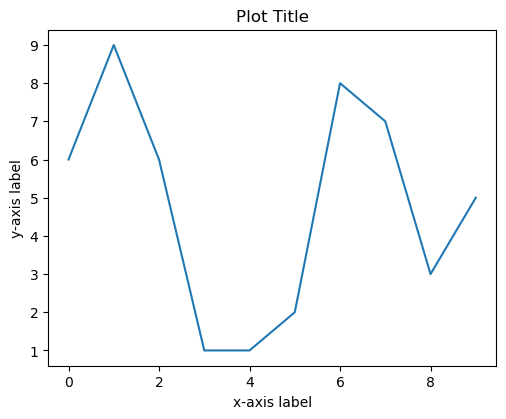

In [12]:
# Single plot — ax.set_title()
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y)
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')

ax.set_title('Plot Title')

plt.show()

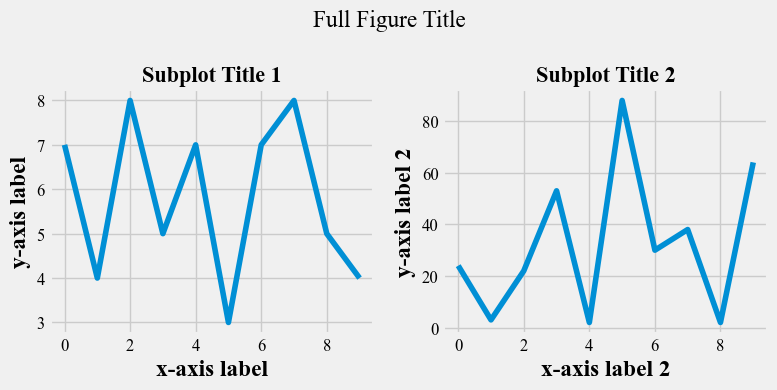

In [72]:
# Subplots — set_title() per axes, suptitle() for the whole figure
figure = plt.figure(figsize=(8, 4))

# left plot
ax1 = figure.add_subplot(121)

ax1.plot(x, y)
ax1.set_xlabel('x-axis label')
ax1.set_ylabel('y-axis label')
ax1.set_title('Subplot Title 1')

# right plot
ax2 = figure.add_subplot(122)

ax2.plot(x, y2)
ax2.set_xlabel('x-axis label 2')
ax2.set_ylabel('y-axis label 2')
ax2.set_title('Subplot Title 2')

figure.suptitle('Full Figure Title')

plt.tight_layout()

plt.show()

### 3c. Legends

Two patterns for adding legend labels:
- Pass a **list of strings** to `ax.legend([...])` — quick but order-dependent
- Set `label=` on each plot call, then call `ax.legend()` — more robust and readable

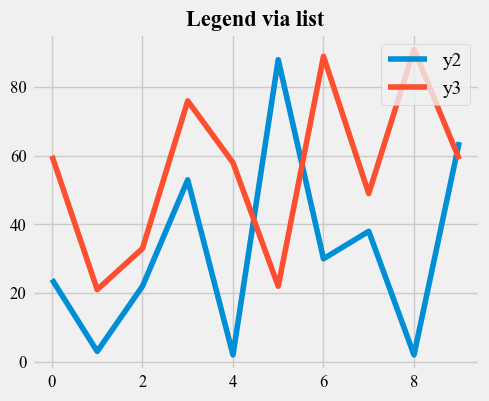

In [75]:
# Option 1 — pass label list
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y2)
ax.plot(x, y3)
ax.set_title('Legend via list')
ax.legend(['y2', 'y3'], loc = 'upper right')
plt.show()

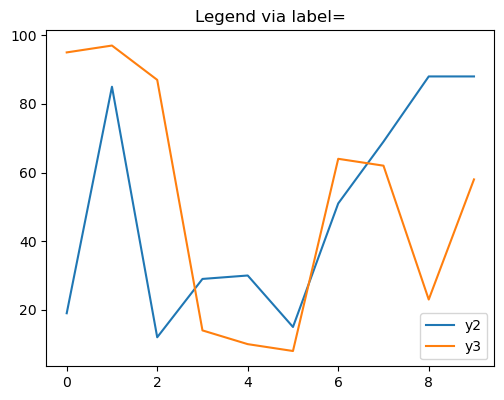

In [15]:
# Option 2 — label= keyword (preferred for many series)
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y2, label='y2')
ax.plot(x, y3, label='y3')
ax.set_title('Legend via label=')
ax.legend(loc='lower right')
plt.show()

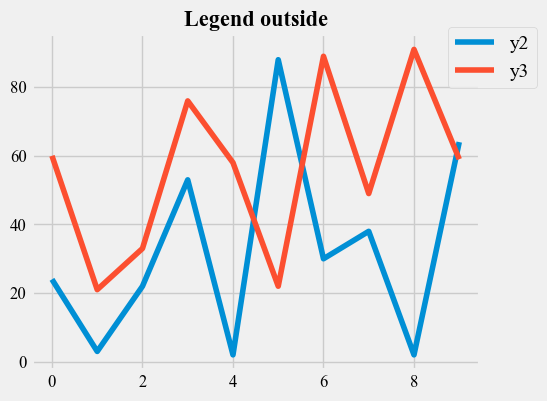

In [83]:
# Move legend outside the plot area with bbox_to_anchor
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y2, label='y2')
ax.plot(x, y3, label='y3')

ax.set_title('Legend outside')

# bbox_to_anchor() argument to place the legend outside of the plot
ax.legend(loc='right', bbox_to_anchor=(1.15, 0.93))
plt.show()

Here is a list of possible legend locations `ax.legend(loc=...)`
- upper right
- upper left
- lower left
- lower right
- right
- center left
- center right
- lower center
- upper center
- center

### ✏️ Check-in 2 — Labels & Legends

Using `x`, `y2`, and `y3`:

1. Create a figure with **two lines** on the same axes. Label each line using the `label=` keyword and call `ax.legend()`. Add x-axis label, y-axis label, and a title.
2. Move the legend **outside** the plot area to the right using `bbox_to_anchor`.

In [17]:
# 1. Two lines with labels and legend


In [18]:
# 2. Legend outside the plot


#### Hint

Use `ax.legend(loc='center', bbox_to_anchor=(x, y))` — try `bbox_to_anchor=(1.15, 0.5)` to push it to the right.

#### Answer

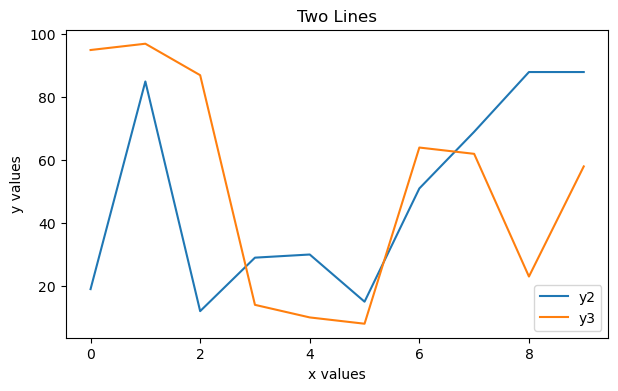

In [19]:
# 1.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y2, label='y2')
ax.plot(x, y3, label='y3')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_title('Two Lines')
ax.legend()

plt.show()

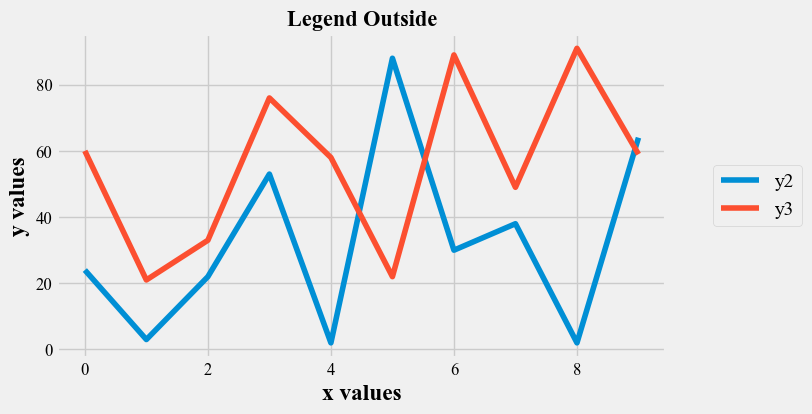

In [81]:
# 2.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y2, label='y2')
ax.plot(x, y3, label='y3')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.set_title('Legend Outside')
ax.legend(loc='center', bbox_to_anchor=(1.15, 0.5))

plt.show()

---
## 4. Ticks & Grids

Tick marks and gridlines guide the reader's eye. Matplotlib gives fine-grained control over both.

### Tick customization methods

| Method | What it does |
|---|---|
| `ax.set_xticks(positions)` | Set where tick marks appear on the x-axis |
| `ax.set_yticks(positions)` | Set where tick marks appear on the y-axis |
| `ax.set_xticklabels(labels)` | Replace numeric tick positions with custom text labels |
| `ax.minorticks_on()` | Add minor (smaller) tick marks between major ticks |
| `ax.grid()` | Add gridlines on major ticks |
| `ax.grid(which='both')` | Add gridlines on major **and** minor ticks |
| `ax.spines['top'].set_visible(False)` | Hide a spine (plot border) |

### 4a. Controlling tick positions and labels

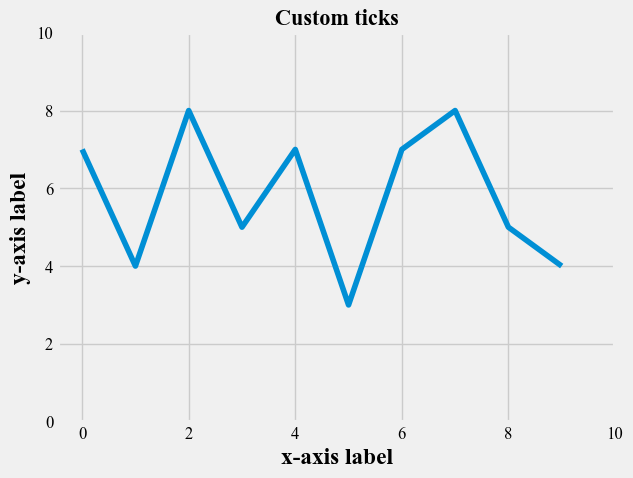

In [87]:
# Set tick positions with set_xticks / set_yticks
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('Custom ticks')
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(0, 11, 2))
plt.show()

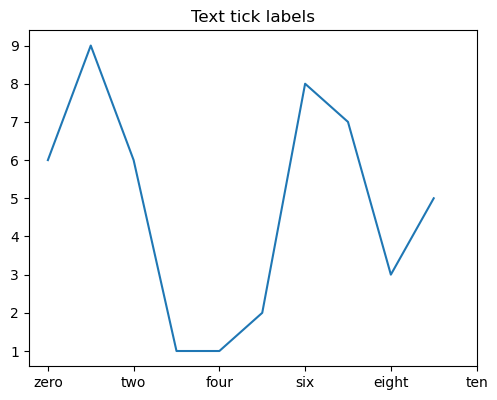

In [22]:
# Replace tick numbers with custom text labels
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y)
ax.set_xticks(np.arange(0, 11, 2))
ax.set_xticklabels(['zero', 'two', 'four', 'six', 'eight', 'ten'])
ax.set_title('Text tick labels')
plt.show()

### 4b. Adding gridlines and cleaning up spines

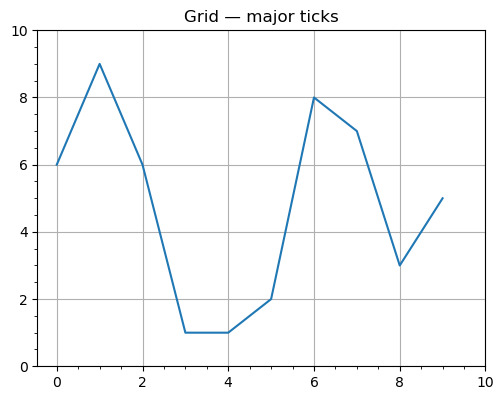

In [23]:
# Grid on major ticks only
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y)
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(0, 11, 2))
ax.minorticks_on()
ax.grid()
ax.set_title('Grid — major ticks')
plt.show()

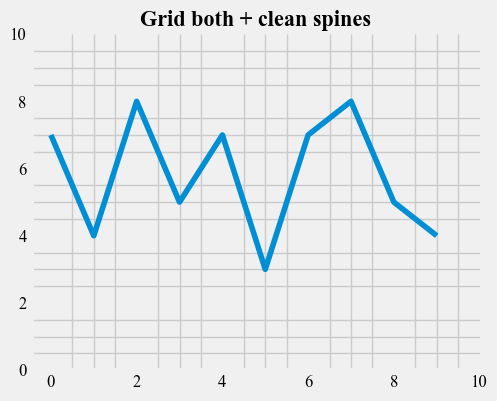

In [91]:
# Grid on major AND minor ticks, and hide top/right spines
figure = plt.figure()
ax = figure.add_axes([0, 0, 0.7, 0.7])

ax.plot(x, y)
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(0, 11, 2))
ax.minorticks_on()
ax.grid(which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Grid both + clean spines')
plt.show()

### ✏️ Check-in 3 — Ticks & Grids

Using `x` and `y`:

1. Create a line plot. Set x-ticks every **1 unit** (0 through 9) and y-ticks every **2 units** (0 through 10). Replace the x-tick labels with the strings `'A'` through `'J'`.
2. Add a grid on **both major and minor ticks**, and hide the **top** and **right** spines.

In [25]:
# 1. Custom ticks with text labels


In [26]:
# 2. Grid on both ticks + remove spines


#### Answer

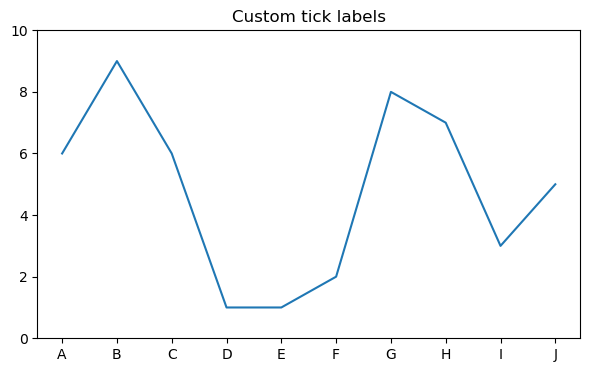

In [27]:
# 1.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(list('ABCDEFGHIJ'))
ax.set_yticks(np.arange(0, 11, 2))
ax.set_title('Custom tick labels')

plt.show()

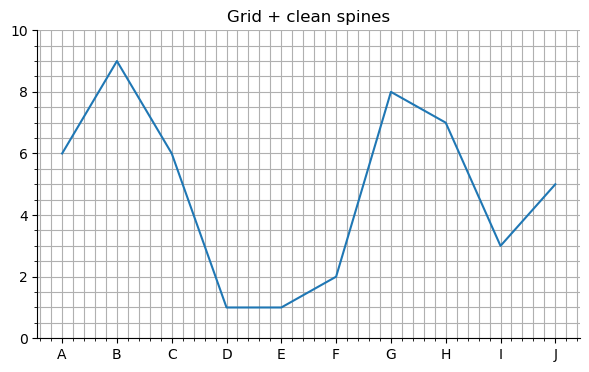

In [28]:
# 2.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(x, y)
ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(list('ABCDEFGHIJ'))
ax.set_yticks(np.arange(0, 11, 2))
ax.minorticks_on()
ax.grid(which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Grid + clean spines')

plt.show()

---
## 5. Annotations & Other Modifications

Sometimes you need to call out a specific data point or fix a formatting issue (e.g., scientific notation on an axis). Here we use the pepper dataset as a motivating example.

### Useful annotation / formatting tools

| Tool | Purpose |
|---|---|
| `ax.annotate('text', xy=target, xytext=label_pos, arrowprops={...})` | Add an arrow + text pointing to a data point |
| `ax.ticklabel_format(style='plain', axis='x')` | Turn off scientific notation on an axis |
| `ax.set_xticklabels(labels, rotation=45)` | Rotate tick labels to prevent overlap |

[visual annotation guide](https://python-graph-gallery.com/how-to-create-and-custom-arrows-matplotlib/)

In [29]:
# Pepper dataset — a fun applied example
peppers = pd.DataFrame({
    'Scoville_scale':    [0.0,    5000.0,  10000.0,  60000.0,   500000.0,    2000000.0],
    'Chili_pepper_scale':[0,      1,       2,        3,         4,           5],
    'Name':              ['Bell pepper', 'Espelette pepper', 'Serrano pepper',
                          "Bird's eye chili", 'Chocolate habanero', 'Carolina Reaper'],
    'Feeling':           ['Not even spicy', 'Uncomfortable', 'I regret this',
                          '4th stage of grief', 'Practically ate pepper spray',
                          'Actually ate pepper spray']
})
peppers

,Scoville_scale,Chili_pepper_scale,Name,Feeling
0,0.0,0,Bell pepper,Not even spicy
1,5000.0,1,Espelette pepper,Uncomfortable
2,10000.0,2,Serrano pepper,I regret this
3,60000.0,3,Bird's eye chili,4th stage of grief
4,500000.0,4,Chocolate habanero,Practically ate pepper spray
5,2000000.0,5,Carolina Reaper,Actually ate pepper spray


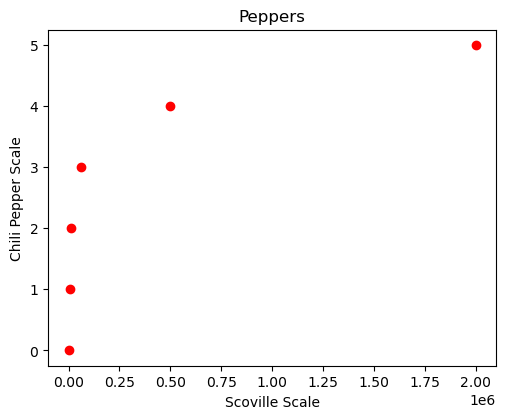

In [30]:
# Base plot
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.7, 0.7])
ax.plot('Scoville_scale', 'Chili_pepper_scale', 'ro', data=peppers)
ax.set_xlabel('Scoville Scale')
ax.set_ylabel('Chili Pepper Scale')
ax.set_title('Peppers')
plt.show()

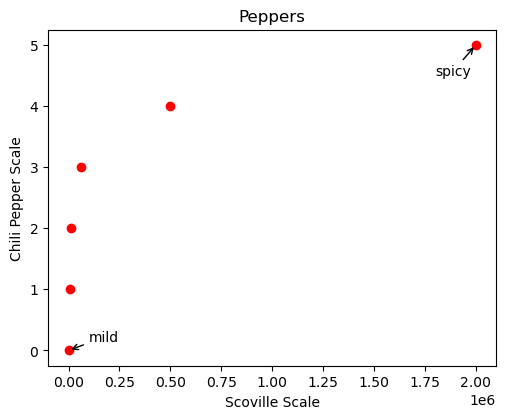

In [31]:
# Add annotations pointing to 'mild' and 'spicy' ends
ax.annotate('mild',
            xytext=(10**5, 0.15),
            xy=(0, 0),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('spicy',
            xytext=(1800000, 4.5),
            xy=(peppers.Scoville_scale.iloc[-1], peppers.Chili_pepper_scale.iloc[-1]),
            arrowprops=dict(arrowstyle='->'))
fig

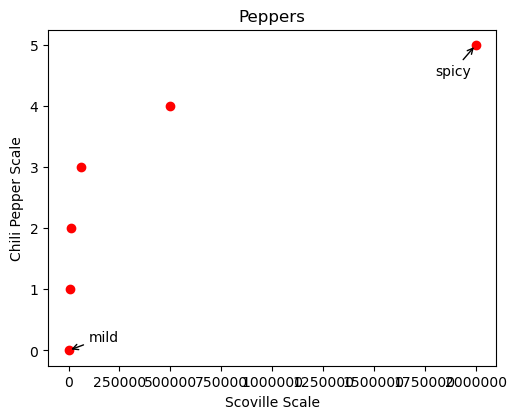

In [32]:
# Remove scientific notation from the x-axis
ax.ticklabel_format(style='plain', axis='x')
fig

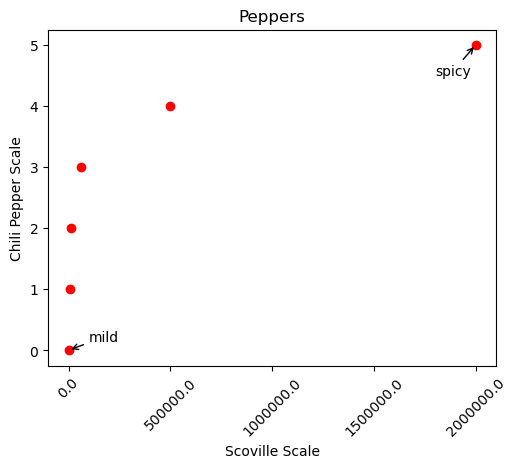

In [33]:
# Rotate x-tick labels 45° so they don't overlap
ax.set_xticks(np.linspace(0, max(peppers.Scoville_scale), 5))
ax.set_xticklabels(np.linspace(0, max(peppers.Scoville_scale), 5), rotation=45)
fig

---
## 6. Styles & Global Settings (`rcParams`)

Instead of setting fonts and colors on every single plot, you can change the **global defaults** once and have all subsequent plots inherit those settings.

### Two tools for global styling

| Tool | What it does | Example |
|---|---|---|
| `plt.style.use('stylename')` | Apply a pre-built style theme | `plt.style.use('fivethirtyeight')` |
| `plt.rcParams['key'] = value` | Override individual global settings | `plt.rcParams['font.size'] = 14` |

### Commonly used `rcParams` keys

| Key | Controls |
|---|---|
| `'font.size'` | Default font size for all text |
| `'font.family'` | Font family (e.g. `'Times New Roman'`, `'sans-serif'`) |
| `'axes.titlesize'` | Title font size |
| `'axes.titleweight'` | Title font weight (`'bold'`) |
| `'axes.labelweight'` | Axis label font weight |
| `'xtick.labelsize'` | X tick label font size |
| `'ytick.labelsize'` | Y tick label font size |

In [34]:
# Apply a built-in style theme + tweak individual settings
plt.style.use('fivethirtyeight')

plt.rcParams['font.size']         = 14
plt.rcParams['font.family']       = 'Times New Roman'
plt.rcParams['axes.labelweight']  = 'bold'
plt.rcParams['axes.titleweight']  = 'bold'
plt.rcParams['axes.titlesize']    = 16
plt.rcParams['xtick.labelsize']   = 12
plt.rcParams['ytick.labelsize']   = 12

### ✏️ Check-in 4 — Styles & Annotations

Using the `peppers` DataFrame (defined in Section 5):

1. Make a scatter plot of `Scoville_scale` (x) vs `Chili_pepper_scale` (y). Add a title and axis labels. Use `'ro'` as the marker style.
2. How would you access the Scoville scale and the Chili pepper scale for the hottest pepper?
3. Add an annotation pointing to the **hottest pepper**. Label it with its `Name` from the DataFrame.

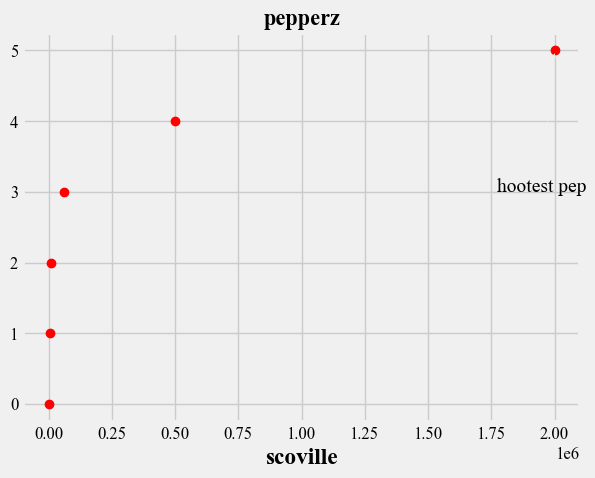

In [36]:
# 2. Annotation on the hottest pepper


#### Hint

Use `idxmax()` to return the max value. The `xy=` argument in `ax.annotate()` is the **tip** of the arrow (the data point); `xytext=` is where the label text sits.

#### Answer

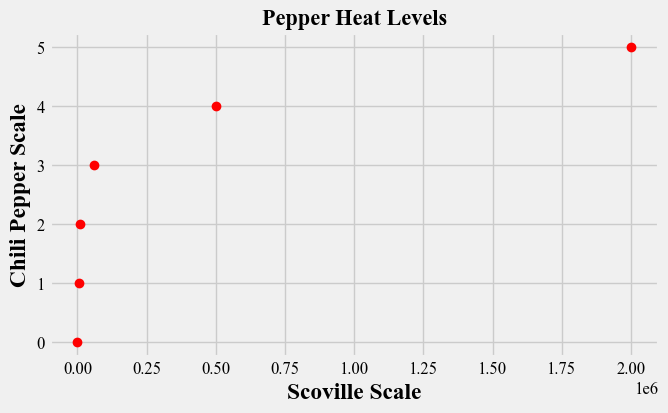

In [37]:
# 1.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot('Scoville_scale', 'Chili_pepper_scale', 'ro', data=peppers)
ax.set_xlabel('Scoville Scale')
ax.set_ylabel('Chili Pepper Scale')
ax.set_title('Pepper Heat Levels')

plt.show()

In [105]:
# 2. maximum hottness!!!
peppers.loc[peppers.Scoville_scale.idxmax(), ['Scoville_scale','Chili_pepper_scale']]

Scoville_scale        2000000.0
Chili_pepper_scale          5.0
Name: 5, dtype: float64

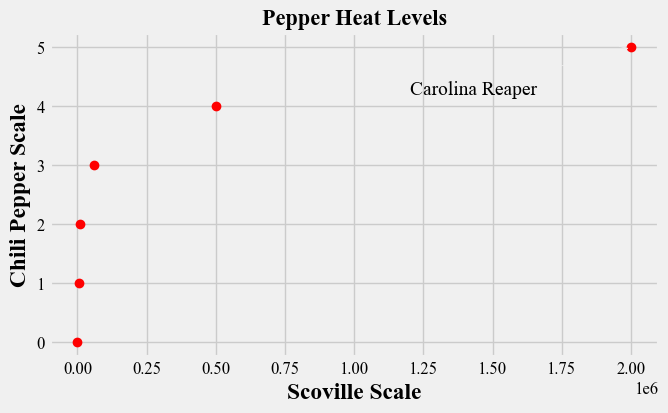

In [38]:
# 3.
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot('Scoville_scale', 'Chili_pepper_scale', 'ro', data=peppers)
ax.set_xlabel('Scoville Scale')
ax.set_ylabel('Chili Pepper Scale')
ax.set_title('Pepper Heat Levels')

hottest = peppers.iloc[-1]
ax.annotate(
    hottest['Name'],
    xy=(hottest['Scoville_scale'], hottest['Chili_pepper_scale']),
    xytext=(1200000, 4.2),
    arrowprops=dict(arrowstyle='->')
)

plt.show()

---
## 7. Applied Example — Real Data

Let's put it all together using a real housing affordability dataset. We'll make a properly labeled, styled scatter plot comparing California and Florida cities.

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/bethanyj0/data271_sp24/main/midterms/property_price.csv')
df.head()

,Rank,City,Price To Income Ratio,Gross Rental Yeild City Centre,Gross Rental Yeild Outside of City,Price To Rent Ratio City Centre,Price To Rent Ratio Outside of City,Mortgage as a Percentage of Income,Affordability Index
0,1,"Santa Barbara, CA",13.3,4.4,6.2,23.0,16.3,103.7,1.0
1,2,"Brooklyn, NY",11.2,4.7,4.3,21.5,23.0,89.9,1.1
2,3,"Queens, NY",11.1,2.8,5.3,35.6,18.8,91.3,1.1
3,4,"New York, NY",10.4,5.6,5.4,17.7,18.7,85.9,1.2
4,5,"Oakland, CA",9.4,6.6,5.4,15.2,18.5,77.5,1.3


In [40]:
# Subset California and Florida cities
cali    = df[df['City'].str.contains('CA')]
florida = df[df['City'].str.contains('FL')]

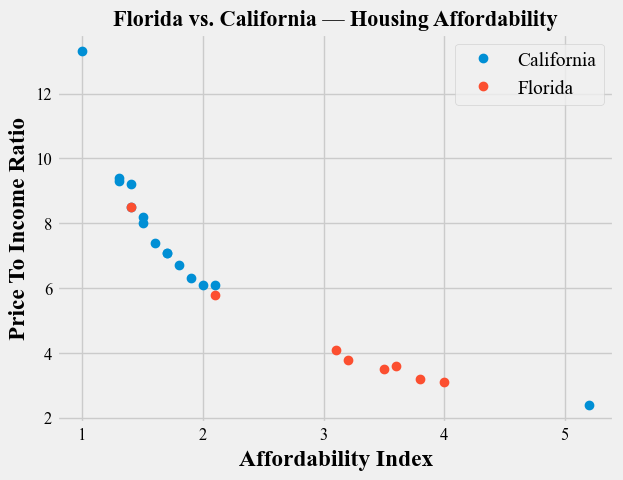

In [41]:
# Well-labeled scatter plot comparing CA vs FL
plt.plot('Affordability Index', 'Price To Income Ratio', 'o',
         data=cali, label='California')
plt.plot('Affordability Index', 'Price To Income Ratio', 'o',
         data=florida, label='Florida')
plt.xlabel('Affordability Index')
plt.ylabel('Price To Income Ratio')
plt.title('Florida vs. California — Housing Affordability')
plt.legend()
plt.show()

---
## 8. Activity

Use the `df` housing dataset for the following exercises.

**Activity 1.** Plot the relationship between `Price To Rent Ratio City Centre` and `Price To Rent Ratio Outside of City`.

- Add a title, legend, and axes labels
- Adjust the ticks
- Play with at least one display option from this lecture

In [42]:
# Activity 1


**Activity 2.** Plot the distribution of `Price To Income Ratio` as a histogram.

- Add a title and axis labels
- Apply any style or `rcParam` customization you like

In [43]:
# Activity 2


---
# Appendix — Quick Reference

## `plt` vs `ax` syntax comparison

| Purpose | `plt` (basic) | `ax` (object-oriented) |
|---|---|---|
| Create figure & axes | `plt.subplots()` | `fig, ax = plt.subplots()` |
| Set figure size | `plt.figure(figsize=(6,4))` | `fig, ax = plt.subplots(figsize=(6,4))` |
| Line plot | `plt.plot(x, y)` | `ax.plot(x, y)` |
| Scatter plot | `plt.scatter(x, y)` | `ax.scatter(x, y)` |
| X label | `plt.xlabel('label')` | `ax.set_xlabel('label')` |
| Y label | `plt.ylabel('label')` | `ax.set_ylabel('label')` |
| Title | `plt.title('title')` | `ax.set_title('title')` |
| Legend | `plt.legend()` | `ax.legend()` |
| Show plot | `plt.show()` | `plt.show()` |

## Object-oriented template

### Single plot
```python
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot('x_column', 'y_column', data=df)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('Title')

plt.show()
```

### 2×2 grid of subplots
```python
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].plot('x_col', 'y_col_1', data=df)
ax[0, 0].set_title('Plot 1')

ax[0, 1].plot('x_col', 'y_col_2', data=df)
ax[0, 1].set_title('Plot 2')

ax[1, 0].plot('x_col', 'y_col_3', data=df)
ax[1, 0].set_title('Plot 3')

ax[1, 1].plot('x_col', 'y_col_4', data=df)
ax[1, 1].set_title('Plot 4')

plt.tight_layout()
plt.show()
```